In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import path
path.append('../../src/')
#path.append('../../../src/tools')
import numpy as np

#from numpy import *
import scipy as sp
from spatiallyAdaptiveExtendSplit import *
from spatiallyAdaptiveSingleDimension2 import *
from spatiallyAdaptiveCell import *

from PerformTestCase import *
from Function import *
from ErrorCalculator import *
from Utils import *
import math
dim = 5
a = 0
b = 1
grid=TrapezoidalGrid(np.ones(dim)*a, np.ones(dim)*b, modified_basis=False, boundary=True)
grid_single_dim = GlobalBSplineGrid(a=a*np.ones(dim), b=b*np.ones(dim), p=3, modified_basis=False, boundary=True)
grid_single_dim2 = GlobalLagrangeGrid(a=a*np.ones(dim), b=b*np.ones(dim), p=3, modified_basis=False, boundary=True)
grid_single_dim_lin = GlobalTrapezoidalGrid(a=a*np.ones(dim), b=b*np.ones(dim), modified_basis=False, boundary=True)


Cannot plot function with dim > 2
Exact integral 7.82141744205e-05
Reference solution: 7.82141744205e-05
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 1053
max surplus error: 0.000244140625 total surplus error: 0.00244140625
combiintegral: -0.00146484375
Current error: 19.72862254
Finished refinement
Refined  10  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 2133
max surplus error: 0.0001220703125 total surplus error: 0.00195782272818
combiintegral: 0.00146014602182
Current error: 17.6685601764
Finished refinement
Refined  20  times
Rebalancing!
Rebalancing!
Rebalancing!
Rebalancing!
Rebalancing!
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number

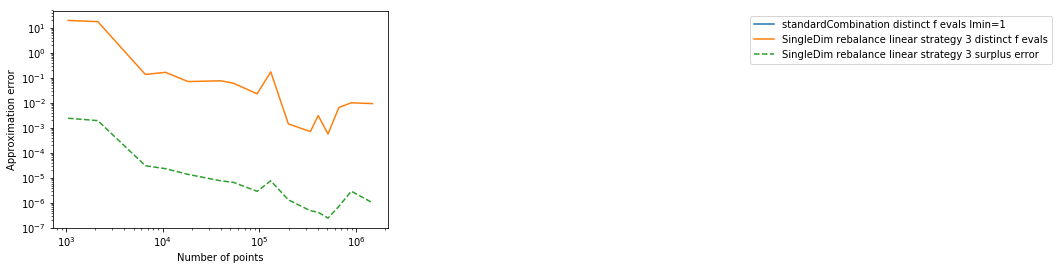

In [2]:
midpoint = np.ones(dim) * 0.2
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim,1,2, errorOperatorSingleDim, 'SingleDim rebalance linear strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,1,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


Cannot plot function with dim > 2
Exact integral 7.82141744205e-05
Reference solution: 7.82141744205e-05
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 1053
max surplus error: 0.000244140625 total surplus error: 0.00244140625
combiintegral: -0.00146484375
Current error: 19.72862254
Finished refinement
Refined  10  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 2133
max surplus error: 0.0001220703125 total surplus error: 0.00195782272818
combiintegral: 0.00146014602182
Current error: 17.6685601764
Finished refinement
Refined  16  times
Rebalancing!
Rebalancing!
Rebalancing!
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number of function evaluations 5

Curent number of function evaluations 829280
max surplus error: 1.59823273646e-08 total surplus error: 1.03494005941e-06
combiintegral: 7.7943520738e-05
Current error: 0.00346041730265
Finished refinement
Refined  36  times
Rebalancing!
Rebalancing!
Rebalancing!
Rebalancing!
New lmax: [9, 9, 8, 9, 9]
Curent number of function evaluations 858797
max surplus error: 2.13116668292e-08 total surplus error: 1.86401610197e-06
combiintegral: 7.6894928832e-05
Current error: 0.0168670908866
Finished refinement
Refined  20  times
Curent number of function evaluations 865169
max surplus error: 1.05247370823e-08 total surplus error: 1.64162200151e-06
combiintegral: 7.71238382487e-05
Current error: 0.0139403909833
Finished refinement
Refined  84  times
Rebalancing!
Rebalancing!
Rebalancing!
Curent number of function evaluations 1028702
max surplus error: 1.3266536189e-08 total surplus error: 5.77096345991e-07
combiintegral: 7.77228394451e-05
Current error: 0.00628191730011
Number of refinements 610


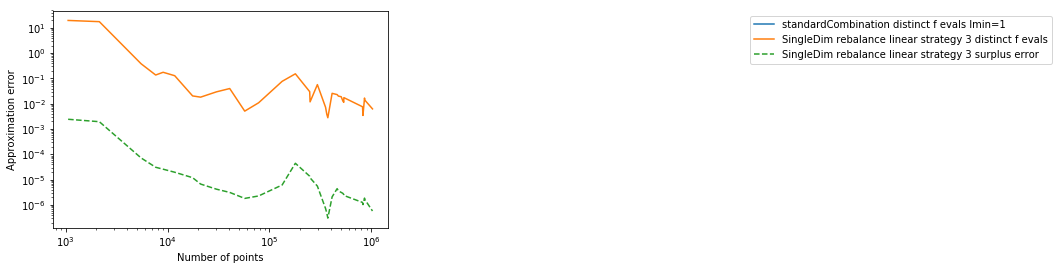

In [ ]:
midpoint = np.ones(dim) * 0.2
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim,1,2, errorOperatorSingleDim, 'SingleDim rebalance linear strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,1,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


Cannot plot function with dim > 2
Exact integral 7.82141744205e-05
Reference solution: 7.82141744205e-05
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 1053
max surplus error: 0.000244140625 total surplus error: 0.00244140625
combiintegral: -0.00146484375
Current error: 19.72862254
Finished refinement
Refined  10  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 2133
max surplus error: 0.0001220703125 total surplus error: 0.00195782272818
combiintegral: 0.00146014602182
Current error: 17.6685601764
Finished refinement
Refined  16  times
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number of function evaluations 4383
max surplus error: 0.00013853658872

Current error: 0.003994476114
Finished refinement
Refined  40  times
New lmax: [17, 16, 16, 15, 15]
New lmax: [17, 17, 16, 15, 15]
New lmax: [17, 17, 17, 15, 15]
New lmax: [17, 17, 17, 16, 15]
New lmax: [17, 17, 17, 16, 16]
Curent number of function evaluations 1079977
max surplus error: 1.57284806775e-08 total surplus error: 4.25258306693e-07
combiintegral: 7.86911060301e-05
Current error: 0.00609776441558
Number of refinements 354
Number of distinct points used during the refinement 1079977
Time used (s): 60583.355377435684
Final error: 0.00609776441558
[] [] Number of Points Standard lmin= 1
[] [] Distinct f evaks Standard lmin= 1
[] [] L2 interpolation error lmin= 1
[] [] Linf interpolation error lmin= 1
[1053, 2133, 4383, 4923, 10878, 17953, 28342, 28612, 42622, 42892, 67179, 67908, 91960, 92230, 116990, 117260, 171150, 180994, 239852, 240122, 330141, 330411, 466894, 482948, 518409, 563892, 745247, 745787, 1079977] [19.728622540003368, 17.66856017638343, 0.66116237096195507, 6.804

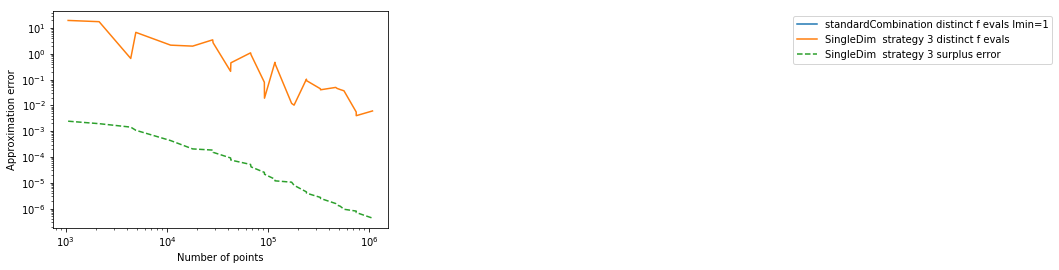

In [2]:
midpoint = np.ones(dim) * 0.2
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim3,1,2, errorOperatorSingleDim, 'SingleDim  strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,1,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


In [ ]:
midpoint = np.ones(dim) * 0.2
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [] #[(adaptiveCombiInstanceSingleDim,1,2, errorOperatorSingleDim, 'SingleDim rebalance linear strategy 3'), (adaptiveCombiInstanceSingleDim3,1,2, errorOperatorSingleDim, 'SingleDim  strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,9,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )
